In [8]:
class NN:
    def __init__(self):
        self.neurons=[]
    
    @staticmethod
    def __init_params(neurons):
        np.random.seed(100)
        W={};
        B={}
        for i in range(1,len(neurons)):
            W[i] = np.random.rand(neurons[i],neurons[i-1]) *0.1
            B[i] = np.zeros((neurons[i],1),dtype=np.float64)
        return W,B
    
    
    def dense(self,*neurons):
        for neuron in neurons:
            self.neurons.append(neuron)
    
    
    @staticmethod
    def __sigmoid(x):
        return(1/(1+np.exp(-x)))

    @staticmethod
    def __relu(x):
        return(np.maximum(0,x))
    
    @staticmethod
    def __forward_propagation(x,w,b,g):
        Z = np.dot(w,x) + b
        return Z, g(Z)

    @staticmethod
    def __full_forward_propagation(X,W,B):
        Z={};A={};A[0] = X
        L = len(W)

        for i in range(1,L):
            Z[i],A[i] = NN.__forward_propagation(A[i-1],W[i],B[i],NN.__relu)
            
        Z[L],A[L] = NN.__forward_propagation(A[L-1],W[L],B[L],NN.__sigmoid)

        return Z,A
    


    @staticmethod
    def __dsigmoid(dA,Z):
        g =NN.__sigmoid(Z)
        return dA * g*(1-g)

    @staticmethod
    def __drelu(dA,z):
        dz = np.array(dA,copy=True)
        dz[z<=0]=0
        return dz

    @staticmethod
    def __backward_propagation(dAf,W,B,Z,A,dg):
        m=A.shape[1]
        dZ=dg(dAf,Z)
        dW=np.dot(dZ,A.T)/m
        dB=np.sum(dZ,axis=1,keepdims=True)/m
        dA0=np.dot(W.T,dZ)
        return dW,dB,dA0
    
    @staticmethod
    def __full_backward_propagation(W,B,Z,A,Y):
        dW ={}
        dB ={}
        dZ={}
        dA={}
        L = len(W)
        
        dA[L] = - (np.divide(Y,A[L]) - np.divide((1-Y),(1-A[L])))
        dW[L],dB[L],dA[L-1] = NN.__backward_propagation(dA[L],W[L],B[L],Z[L],A[L-1],NN.__dsigmoid)
        
        for i in reversed(range(1,L)):
            dW[i],dB[i],dA[i-1] = NN.__backward_propagation(dA[i],W[i],B[i],Z[i],A[i-1],NN.__drelu)

        return dW,dB
    
    

    @staticmethod
    def __update_params(W,B,dW,dB,lr):
        L = len(W)
        for i in range(1,L+1):
            W[i]-=dW[i]*lr
            B[i]-=dB[i]*lr
        return W,B

    @staticmethod
    def __cost_function(AL,y):
        m=AL.shape[1]
        cost = (-1/m) * np.sum(np.multiply(y,np.log(AL)) + np.multiply((1-y),np.log(1-AL)))
        # Make sure cost is a scalar
        cost = np.squeeze(cost)
        return cost
    
    @staticmethod
    def __convert_prob_into_class(AL):
        pred = np.copy(AL)
        pred[AL > 0.5]  = 1
        pred[AL <= 0.5] = 0
        return pred

    @staticmethod
    def __get_accuracy(AL, Y):
        pred = NN.__convert_prob_into_class(AL)
        return (pred == Y).all(axis=0).mean()
    
    
    def train(self,X,y,n_epochs=1,lr=1e-3,verbose=1):
        epochs={}
        
        neurons = self.neurons

        #initialize params
        W,B = NN.__init_params(neurons)

        L=len(W)

        for i in range(1,n_epochs+1):
            #forward
            Z,A = NN.__full_forward_propagation(X,W,B)

            #calculate cost and accuracy
            cost = NN.__cost_function(A[L],y)
            accuracy =NN.__get_accuracy(A[L],y)

            epochs[i]={"cost":cost,"accuracy":accuracy}

            if verbose==1 :
                print(f'epoch:{i}/{n_epochs}',end='\r')

            #backward
            dW,dB = NN.__full_backward_propagation(W,B,Z,A,y)

            #Update
            W,B = NN.__update_params(W,B,dW,dB,lr)

        self.__W=W
        self.__B=B
        self.epochs=epochs

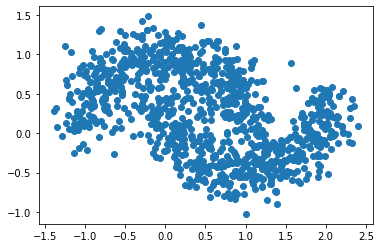

In [4]:
import sklearn
from sklearn import datasets
N_SAMPLES = 1000
X, y = sklearn.datasets.make_moons(n_samples = N_SAMPLES, noise=0.2, random_state=100)

import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1])

In [9]:
nn=NN()
nn.dense(2,25,100,100,10,1)
nn.train(X.T, y, 101,lr=0.01,verbose=1)

In [10]:
nn.epochs

{1: {'cost': 0.7460444340378486, 'accuracy': 0.494},
 2: {'cost': 0.7338567557550496, 'accuracy': 0.511},
 3: {'cost': 0.7239638557354885, 'accuracy': 0.518},
 4: {'cost': 0.7158433721741387, 'accuracy': 0.52},
 5: {'cost': 0.7091079060794013, 'accuracy': 0.522},
 6: {'cost': 0.7034851028581444, 'accuracy': 0.53},
 7: {'cost': 0.6987548478972424, 'accuracy': 0.533},
 8: {'cost': 0.694704255585931, 'accuracy': 0.536},
 9: {'cost': 0.6911938527163125, 'accuracy': 0.541},
 10: {'cost': 0.6881323269766223, 'accuracy': 0.543},
 11: {'cost': 0.685435499294437, 'accuracy': 0.543},
 12: {'cost': 0.6830363755344336, 'accuracy': 0.541},
 13: {'cost': 0.6808768038296455, 'accuracy': 0.543},
 14: {'cost': 0.678909215071405, 'accuracy': 0.548},
 15: {'cost': 0.677093199498806, 'accuracy': 0.552},
 16: {'cost': 0.6754031953227992, 'accuracy': 0.552},
 17: {'cost': 0.6738151424544108, 'accuracy': 0.555},
 18: {'cost': 0.6723122612795963, 'accuracy': 0.558},
 19: {'cost': 0.6708883937605973, 'accuracy